<a href="https://colab.research.google.com/github/Libby-K/Kagggle-Fetal-Health-Classification/blob/main/EDA_Data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.stats import spearmanr

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

import pickle


In [ ]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### EDA

In [ ]:
df.shape

(2126, 22)

In [ ]:
print('Number of duplicated rows: ',len(df[df.duplicated()]))

Number of duplicated rows:  13


In [ ]:
# Removing duplicates
df.drop_duplicates(inplace = True)

In [ ]:
# Count the missing and null values for dataset fetal healt.
miss_values = df.columns[df.isnull().any()]
print(f"Missing values:\n{df[miss_values].isnull().sum()}")

null_values = df.columns[df.isna().any()]
print(f"Null values:\n{df[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


There is no missing data in this dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


There are nocolumns with constant values

In [ ]:
# lets see if the target is balanced
df['fetal_health'].value_counts(normalize = True)

1.0    0.778987
2.0    0.138192
3.0    0.082821
Name: fetal_health, dtype: float64

The target is unbalanced and this might lead to difficulties in prediction and accuracy cant be chosen as evaluation metrics for the model.

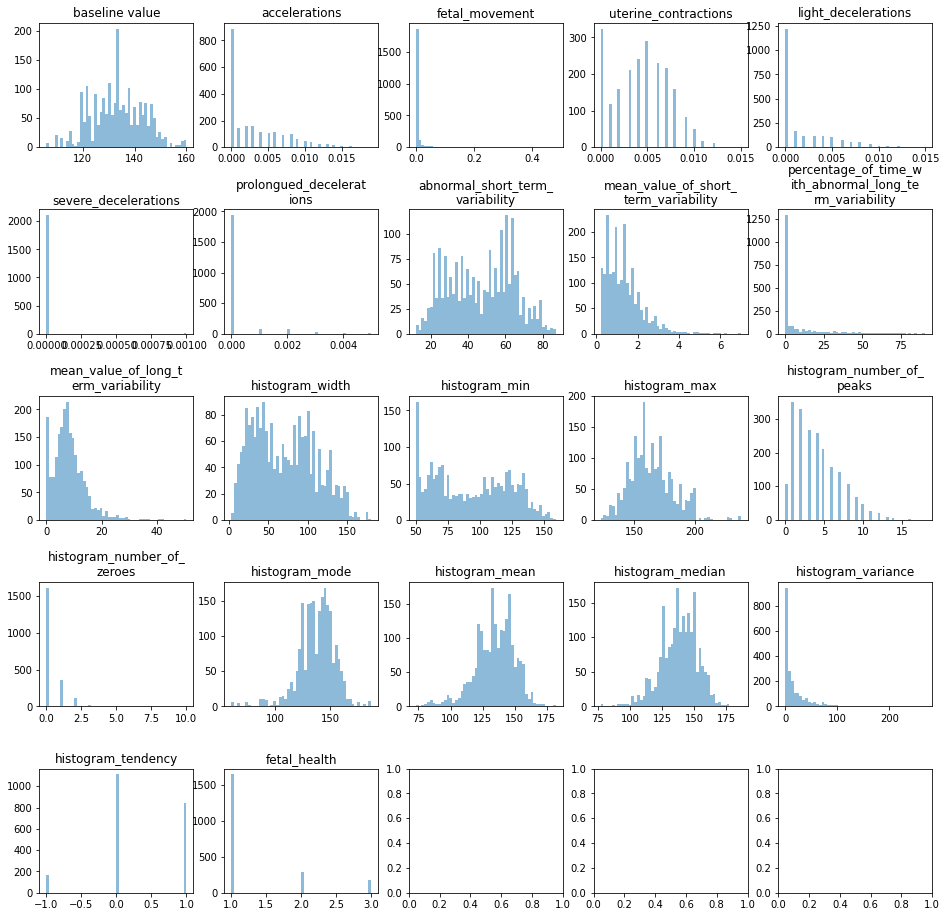

In [ ]:
import textwrap
nrows = 5
ncols = 5
columns = df.columns.to_list()

# Create the figure and subplots
fig, ax = plt.subplots(nrows, ncols, figsize=(16, 16))

# Loop through the columns and plot a histogram for each one
for i, column in enumerate(columns):
    # Get the subplot at the current position
    axi = ax[i // ncols, i % ncols]
    axi.hist(df[column], alpha=0.5, label=column, bins = 50)
    # Break the title to several lines
    title = "\n".join(textwrap.wrap(column, width=20))
    axi.set_title(title)
    
plt.subplots_adjust(hspace=0.5)
# Show the plot
plt.show()

Some of the data is left skewed some is right skews and some seems normaly distributed

In [ ]:
df['severe_decelerations'].value_counts()

0.000    2106
0.001       7
Name: severe_decelerations, dtype: int64

The data is continuous except the severe_decelerations histogram tendency and the target so its ok to use pearson corelation to see if some features are corelated to each other

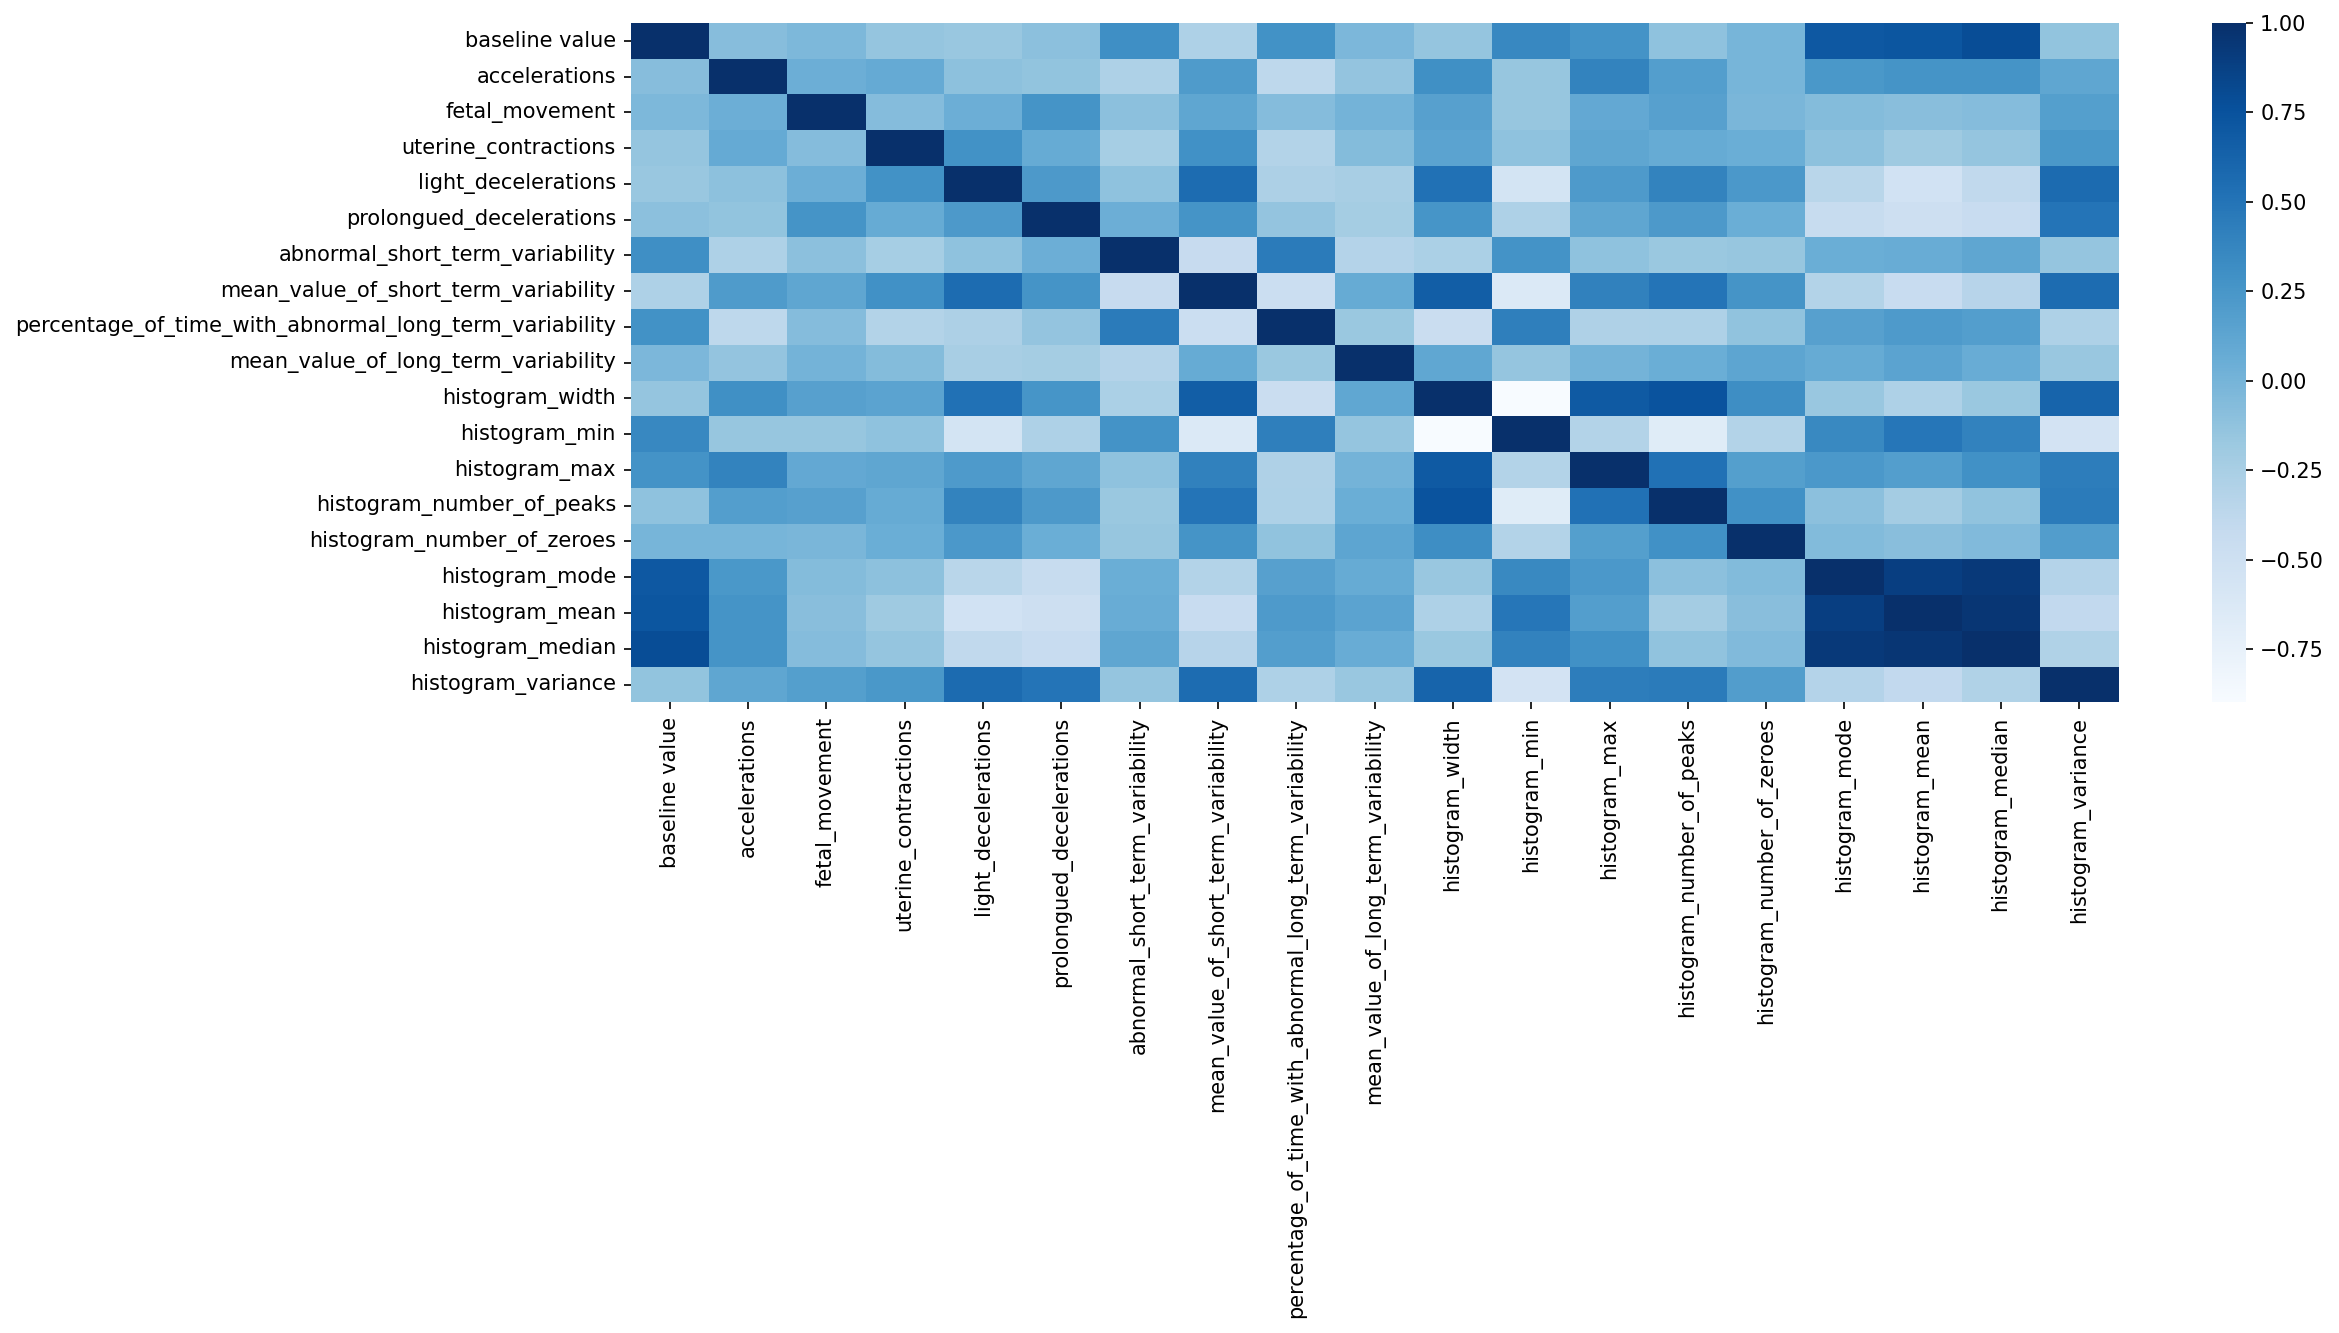

In [ ]:
# Calculate the Pearson correlation between the columns
df_temp = df.drop('severe_decelerations', axis = 1)
df_temp = df_temp.iloc[:,:-2]
corr = df_temp.corr()

# Plot the heatmap
plt.figure(figsize=(16, 6), dpi=150)
sns.heatmap(corr, annot=False, cmap='Blues', fmt='.2f')
plt.show()

There seems to be high corelation between histogram mode,mean and median, maybe I will remove one or two of them

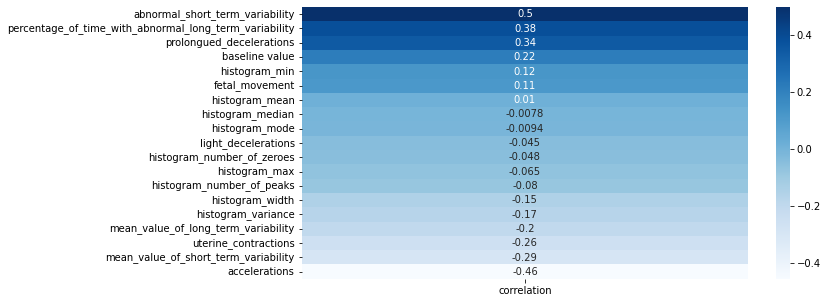

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the continuous features and target
X = df_temp
y = df.iloc[:,-1]

# Calculate the correlations between the features and target
correlations = {}
for feature in X.columns:
    rho, p = spearmanr(X[feature], y)
    correlations[feature] = rho

# Sort the correlations by value in descending order
sorted_correlations = {k: v for k, v in sorted(correlations.items(), key=lambda item: item[1], reverse=True)}
# Create a dataframe of the sorted correlations
correlations_df = pd.DataFrame.from_dict(sorted_correlations, orient='index', columns=['correlation'])
# Create a heatmap of the correlations
plt.figure(figsize=(10, 5))
sns.heatmap(correlations_df, cmap='Blues', annot=True)
plt.show()

The histogram mean has the highest correlation to the target it will be the one that will be kept

### Outliers handeling

Outliers can be seen visualy by histograms or boxplots, computationaly IQR is agood technique  to identify outliers. The IQR is the difference between the third quartile (Q3) and the first quartile (Q1). Outliers are typically defined as observations that fall outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR.

In [ ]:
def get_outlier_rows(df):
    # Initialize a list to store the row indexes
    outlier_rows = []
    
    # Get the columns as a list
    columns = df.columns.to_list()

    # Iterate over the columns
    for col in columns:
        # Calculate the IQR
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1

        # Identify the rows with outliers in the column
        outlier_mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outlier_rows.extend(df[outlier_mask].index.tolist())

    # Return the unique row indexes
    return list(set(outlier_rows))

In [ ]:
# Call the function and print the results
outlier_indexes = get_outlier_rows(df_temp)
print(f'the num of outliers is {len(outlier_indexes)}')

the num of outliers is 63


In [ ]:
# Drop the rows with the specified indexes from the original DataFrame
df.drop(index=outlier_indexes, inplace=True,errors='ignore')

In [ ]:
df['severe_decelerations'].value_counts()

0.000    2043
0.001       7
Name: severe_decelerations, dtype: int64

### Dimensionality reduction 

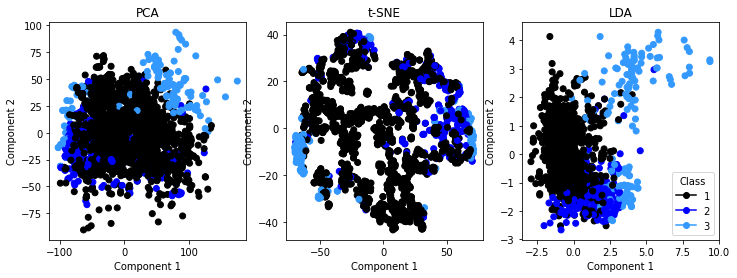

In [ ]:
# Extract the input features and target labels from the DataFrame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Initialize the dimensionality reduction methods
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)

# Apply the dimensionality reduction methods to the dataset
X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)
X_lda = lda.fit_transform(X, y)

# Define a color map for the three target classes
colors = {1: "black", 2: "#0000FF", 3: "#3399FF"}

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Create legend handles
legend_handles = [Line2D([], [], marker='o', color=colors[c], label=c) for c in colors]

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[c] for c in y])
axs[0].set_title("PCA")
axs[0].set_xlabel("Component 1")
axs[0].set_ylabel("Component 2")

axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=[colors[c] for c in y])
axs[1].set_title("t-SNE")
axs[1].set_xlabel("Component 1")
axs[1].set_ylabel("Component 2")

axs[2].scatter(X_lda[:, 0], X_lda[:, 1], c=[colors[c] for c in y])
axs[2].set_title("LDA")
axs[2].set_xlabel("Component 1")
axs[2].set_ylabel("Component 2")

# Add the legend to the plot
plt.legend(handles=legend_handles, title='Class')

plt.show()

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique that aims to find the linear combinations of features that best discriminate between the different classes in the dataset. LDA does this by maximizing the ratio of between-class variance to within-class variance.

In contrast, Principal Component Analysis (PCA) is an unsupervised technique that finds the directions in the feature space that capture the maximum amount of variance in the dataset, regardless of the class labels. As a result, PCA is generally not able to achieve good separation between the classes.

t-Distributed Stochastic Neighbor Embedding (t-SNE) is also an unsupervised technique that tries to preserve the local structure of the data while reducing the dimensionality. t-SNE is often used for visualization purposes and is not specifically designed to achieve good separation between the classes.

Therefore, it is generally not surprising that LDA was able to achieve better separation between the classes compared to PCA and t-SNE. LDA is specifically designed to find linear combinations of features that discriminate between the different classes, while PCA and t-SNE do not take the class labels into account.

### Feature selection

Filter methods: Filter methods select features based on a statistical measure of their importance, such as their correlation with the target variable or their information gain. These methods do not consider the relationship between the features and the target variable and are typically fast and efficient, as they do not require training a model for each feature subset. Examples of filter methods include selecting features based on the p-value of a statistical test or the feature importance scores of a machine learning model.

Wrapper methods: Wrapper methods select features by training a model using different subsets of features and evaluating the performance of each subset. These methods consider the relationship between the features and the target variable and can handle non-linear relationships. However, they can be computationally expensive, as they require training a model for each feature subset. Examples of wrapper methods include forward selection, backward elimination, and recursive feature elimination (RFE).

Embedded methods: Embedded methods perform feature selection as part of the model training process. These methods learn the optimal combination of features and model parameters simultaneously, so they can handle non-linear relationships and multicollinearity between features. However, they may be sensitive to the choice of model and its hyperparameters and may not select the "optimal" subset of features in terms of prediction performance. Examples of embedded methods include Lasso and Ridge regression.

#### Pros and cons

##### Filter methods:

Pros:

Fast and efficient, as they do not require training a model for each feature subset
Can handle large datasets with a large number of features
Can provide insight into the relative importance of different features

Cons:

May not consider the interactions between features
May be biased towards features with more levels or a larger number of missing values

##### Wrapper methods:

Pros:

Considers the relationship between the features and the target variable, so it can select a subset of features that is more predictive
Can handle non-linear relationships between features and the target variable

Cons:

Can be computationally expensive, as it requires training a model for each feature subset
May be sensitive to the choice of model and its hyperparameters

##### Embedded methods:

Pros:

Automatically performs feature selection as part of the model training process
Can handle non-linear relationships between features and the target variable
Can handle multicollinearity between features

Cons:

May be sensitive to the choice of model hyperparameters
May not select the "optimal" subset of features in terms of prediction performance, as it is biased towards selecting a small number of features

The feature selection must be done only according to the train set

In [ ]:
# Removing 'histogram_mode' and 'histogram_median'

df.drop(['histogram_mode' , 'histogram_median'], axis = 1, inplace = True, errors='ignore')


# Extract the input features and target from the DataFrame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Split the data into train and test sets, with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Extract the 'histogram_tendency' and 'severe_decelerations' columns from the training and test data since they are ordinal and not continuous
histogram_tendency_train = X_train[['histogram_tendency']]
severe_decelerations_train = X_train[['severe_decelerations']]
histogram_tendency_test = X_test[['histogram_tendency']]
severe_decelerations_test = X_test[['severe_decelerations']]

# Drop the 'histogram_tendency' and 'severe_decelerations' columns from the training and test data
X_train.drop(['histogram_tendency', 'severe_decelerations'], axis=1, inplace=True)
X_test.drop(['histogram_tendency', 'severe_decelerations'], axis=1, inplace=True)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler to the training data
scaler.fit(X_train)

# Transform the training and test data, while keeping the original column names and indexes
X_train_standardized = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns , index = X_train.index)
X_test_standardized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index = X_test.index )

# Add the 'histogram_tendency' and 'severe_decelerations' columns back to the training and test data
X_train_standardized['histogram_tendency'] = histogram_tendency_train
X_train_standardized['severe_decelerations'] = severe_decelerations_train
X_test_standardized['histogram_tendency'] = histogram_tendency_test
X_test_standardized['severe_decelerations'] = severe_decelerations_test

#### Filter method

In [ ]:
# Separate the features and target
X = X_train_standardized
y = y_train

# Create the classifier object
clf = RandomForestClassifier(random_state=0)

# Fit the classifier to the data
clf.fit(X, y)

# Get the feature importances
importances = clf.feature_importances_

# Get the feature names
feature_names = X.columns

# Zip the feature names and importances together and sort by importance
features_and_importances_filter = pd.DataFrame(sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True), columns = {'Feature','Importance'})

# Print the tfeature importance data
features_and_importances_filter

,Feature,Importance
0,abnormal_short_term_variability,0.151515
1,mean_value_of_short_term_variability,0.134525
2,histogram_mean,0.126961
3,percentage_of_time_with_abnormal_long_term_var...,0.125229
4,mean_value_of_long_term_variability,0.055494
5,histogram_min,0.048980
6,accelerations,0.046816
7,uterine_contractions,0.043670
8,prolongued_decelerations,0.043619
9,histogram_width,0.043477


#### Wrapper methods

In [ ]:
# Create the model
model = LogisticRegression(random_state=0)

# Create the RFECV object and set the number of folds for cross-validation
rfe = RFECV(model, cv=5)

# Fit the RFECV object to the data and get the selected features
X_selected = rfe.fit_transform(X, y)

# Get the feature names of the selected features
selected_feature_names_wrapper = X.columns[rfe.get_support()]

# Print the features len and the features
print('The Number of features that were selected is ', len(selected_feature_names_wrapper))
print('The features are are ', selected_feature_names_wrapper)

The Number of features that were selected is  15
The features are are  Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_max',
       'histogram_number_of_peaks', 'histogram_number_of_zeroes',
       'histogram_mean', 'histogram_variance'],
      dtype='object')


#### Embedded method

In [ ]:
# Create the model
model = Lasso(alpha=0.001)

# Create the selector object and set the coefficient threshold
selector = SelectFromModel(model, threshold=0.01)

# Fit the selector to the data and get the selected features
X_selected = selector.fit_transform(X, y)

# Get the feature names of the selected features
selected_feature_names_embeded = X.columns[selector.get_support()]

# Print the features len and the features
print('The Number of features that were selected is ', len(selected_feature_names_embeded))
print('The features are are ', selected_feature_names_embeded)

The Number of features that were selected is  15
The features are are  Index(['baseline value', 'fetal_movement', 'uterine_contractions',
       'light_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_min', 'histogram_max',
       'histogram_number_of_peaks', 'histogram_number_of_zeroes',
       'histogram_mean', 'histogram_variance'],
      dtype='object')


There are two options, to take the intersection of the feature selection methods or to take the combination

In [ ]:
def intersect(list1, list2):
    """Calculate the intersection of the two lists using the set intersection operator."""
    return list(set(list1) & set(list2))

# Calculate the intersection of the selected feature names from the wrapper and embedding methods
intersect1 = intersect(selected_feature_names_wrapper, selected_feature_names_embeded)

# Further filter the result by taking the top 15 most important filter method features according to their importance values
intersect2 = intersect(intersect1, features_and_importances_filter['Feature'].head(15).to_list())

# Print the length and contents of the resulting list
print('The number of filtered features: ',len(intersect2))
print(intersect2)

The number of filtered features:  12
['fetal_movement', 'baseline value', 'mean_value_of_long_term_variability', 'prolongued_decelerations', 'abnormal_short_term_variability', 'histogram_mean', 'uterine_contractions', 'histogram_max', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_number_of_peaks', 'mean_value_of_short_term_variability', 'histogram_variance']


In [ ]:
# Combine the selected feature names from the wrapper and embedding methods into a single list
combined = selected_feature_names_wrapper.append(selected_feature_names_embeded)

# Convert the combined list to a list and append the top 10 features from the filtered importance values
combined_ = combined.to_list() + (features_and_importances_filter['Feature'].head(15).to_list())

# Convert the resulting list to a set to remove duplicates
combined_features = set(combined_)

# Print the length and contents of the resulting set
print('The number of combined features: ',len(combined_features))
print(combined_features)

The number of combined features:  17
{'light_decelerations', 'fetal_movement', 'baseline value', 'histogram_min', 'accelerations', 'mean_value_of_long_term_variability', 'prolongued_decelerations', 'abnormal_short_term_variability', 'histogram_mean', 'uterine_contractions', 'histogram_max', 'histogram_number_of_zeroes', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_number_of_peaks', 'histogram_width', 'mean_value_of_short_term_variability', 'histogram_variance'}


In [ ]:
# Select the columns in 'intersect2' from the scaled training data
X_train_scaled_intersect = X_train_scaled.loc[:, list(intersect2)]

# Join the selected columns with the target column 'y_train'
df_train_scaled_intersect = X_train_scaled_intersect.join(y_train)

# Select the columns in 'intersect2' from the scaled test data
X_test_scaled_intersect = X_test_scaled.loc[:, list(intersect2)]

# Join the selected columns with the target column 'y_test'
df_test_scaled_intersect = X_test_scaled_intersect.join(y_test)

# Select the columns in 'combined_features' from the scaled training data
X_train_scaled_combined = X_train_scaled.loc[:, list(combined_features)]

# Join the selected columns with the target column 'y_train'
df_train_scaled_combined = X_train_scaled_combined.join(y_train)

# Select the columns in 'combined_features' from the scaled test data
X_test_scaled_conbined = X_test_scaled.loc[:, list(combined_features)]

# Join the selected columns with the target column 'y_test'
df_test_scaled_combined = X_test_scaled_conbined.join(y_test)


In [ ]:
# Pickle the df_train_scaled_intersect dataframe
with open('df_train_scaled_intersect.pkl', 'wb') as f:
    pickle.dump(df_train_scaled_intersect, f)

# Pickle the df_test_scaled_intersect dataframe
with open('df_test_scaled_intersect.pkl', 'wb') as f:
    pickle.dump(df_test_scaled_intersect, f)

# Pickle the df_train_scaled_combined dataframe
with open('df_train_scaled_combined.pkl', 'wb') as f:
    pickle.dump(df_train_scaled_combined, f)

# Pickle the df_test_scaled_combined dataframe
with open('df_test_scaled_combined.pkl', 'wb') as f:
    pickle.dump(df_train_scaled_combined, f)
